## Binary Random Forest / KNN

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [136]:
df_train = pd.read_csv("../data_mod/train_motion_data.csv")
df_test = pd.read_csv("../data_mod/test_motion_data.csv")

df_train


,AccX,AccY,GyroZ,Class,DiffAccX,DiffAccY,VelX,VelY
0,0.000000,0.000000,0.101938,NORMAL,0.000000,0.000000,0.000000,0.000000
1,0.101741,0.777568,0.054902,NORMAL,-0.636737,1.006023,0.050871,0.388784
2,0.158470,0.345891,0.014584,NORMAL,0.056728,-0.431676,0.079235,0.172946
3,0.308851,0.239022,-0.072769,NORMAL,-0.543828,0.655800,0.154425,0.119511
4,0.163595,0.475107,-0.061163,NORMAL,0.768208,-0.365124,0.081798,0.237554
...,...,...,...,...,...,...,...,...
965,0.872744,0.801287,-0.139964,SLOW,-0.857083,0.085469,0.436372,0.400644
966,1.464669,0.226299,-0.170508,SLOW,0.591925,-0.574988,0.732334,0.113149
967,1.587379,0.583067,-0.196164,SLOW,0.122710,0.356769,0.793690,0.291534
968,0.319258,0.272088,-0.062385,SLOW,-0.383045,1.202910,0.159629,0.136044


In [137]:
df_train.isna().sum()

AccX        0
AccY        0
GyroZ       0
Class       0
DiffAccX    0
DiffAccY    0
VelX        0
VelY        0
dtype: int64

### Change categories to numbers

In [138]:
df_train = df_train.replace(
    {"Class": {"NORMAL": 0, "SLOW": 1, "AGGRESSIVE": 2}})
df_test = df_test.replace(
    {"Class": {"NORMAL": 0, "SLOW": 1, "AGGRESSIVE": 2}})
df_train


,AccX,AccY,GyroZ,Class,DiffAccX,DiffAccY,VelX,VelY
0,0.000000,0.000000,0.101938,0,0.000000,0.000000,0.000000,0.000000
1,0.101741,0.777568,0.054902,0,-0.636737,1.006023,0.050871,0.388784
2,0.158470,0.345891,0.014584,0,0.056728,-0.431676,0.079235,0.172946
3,0.308851,0.239022,-0.072769,0,-0.543828,0.655800,0.154425,0.119511
4,0.163595,0.475107,-0.061163,0,0.768208,-0.365124,0.081798,0.237554
...,...,...,...,...,...,...,...,...
965,0.872744,0.801287,-0.139964,1,-0.857083,0.085469,0.436372,0.400644
966,1.464669,0.226299,-0.170508,1,0.591925,-0.574988,0.732334,0.113149
967,1.587379,0.583067,-0.196164,1,0.122710,0.356769,0.793690,0.291534
968,0.319258,0.272088,-0.062385,1,-0.383045,1.202910,0.159629,0.136044


### Remove unnecessary columns

In [139]:
# df_train.drop(['AccZ', 'GyroX', 'GyroY', 'Timestamp'], axis=1, inplace=True)
# df_test.drop(['AccZ', 'GyroX', 'GyroY', 'Timestamp'], axis=1, inplace=True)

# df_train

### Only select normal and aggressive values

In [140]:
df_train = df_train.loc[df_train['Class'] != 1]
df_test = df_test.loc[df_test['Class'] != 1]

df_train

,AccX,AccY,GyroZ,Class,DiffAccX,DiffAccY,VelX,VelY
0,0.000000,0.000000,0.101938,0,0.000000,0.000000,0.000000,0.000000
1,0.101741,0.777568,0.054902,0,-0.636737,1.006023,0.050871,0.388784
2,0.158470,0.345891,0.014584,0,0.056728,-0.431676,0.079235,0.172946
3,0.308851,0.239022,-0.072769,0,-0.543828,0.655800,0.154425,0.119511
4,0.163595,0.475107,-0.061163,0,0.768208,-0.365124,0.081798,0.237554
...,...,...,...,...,...,...,...,...
590,2.251131,1.144779,-0.157069,2,2.343684,1.371086,1.125565,0.572390
591,0.835830,0.448533,-0.243812,2,-1.415301,-0.696246,0.417915,0.224266
592,1.737348,0.775190,-0.179060,2,0.798653,1.006152,0.868674,0.387595
593,0.893512,1.587903,-0.058719,2,0.817109,1.925164,0.446756,0.793952


In [141]:
X_train = df_train.drop(columns=["Class"])
y_train = df_train['Class']

X_test = df_test.drop(columns=["Class"])
y_test = df_test['Class']

### Normalize data

In [142]:
X_train = (X_train - X_train.mean()) / X_train.std() * 100
X_test = (X_test - X_test.mean()) / X_test.std() * 100

X_train

,AccX,AccY,GyroZ,DiffAccX,DiffAccY,VelX,VelY
0,-112.259505,-113.126599,114.530826,-53.626286,-61.735289,-112.259505,-113.126599
1,-98.990521,1.736333,69.974799,-118.009186,36.103370,-98.990521,1.736333
2,-91.592040,-62.031275,31.783917,-47.890255,-103.717074,-91.592040,-62.031275
3,-71.979452,-77.818022,-50.962992,-108.614796,2.043186,-71.979452,-77.818022
4,-90.923528,-42.943388,-39.968647,24.050135,-97.244611,-90.923528,-42.943388
...,...,...,...,...,...,...,...
590,181.331076,55.981150,-130.816660,183.352460,71.606804,181.331076,55.981150
591,-3.251245,-46.868949,-212.984917,-196.732705,-129.447266,-3.251245,-46.868949
592,114.323949,1.385121,-151.648052,27.128507,36.115876,114.323949,1.385121
593,4.271540,121.439825,-37.654052,28.994734,125.492451,4.271540,121.439825


## Train model

### Random Forest

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [144]:
rfc = RandomForestClassifier(n_estimators=30, max_depth=15, random_state=5, criterion="entropy")
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=30,
                       random_state=5)

In [145]:
rfc.score(X_train, y_train)

0.9899159663865547

In [146]:
rfc.score(X_test, y_test)

0.5483158475980121

In [147]:
classes=['NORMAL', 'AGGRESSIVE']

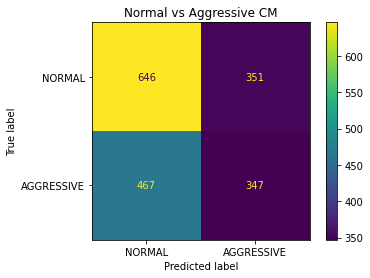

In [148]:
y_pred = rfc.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=classes).plot()
plt.title('Normal vs Aggressive CM')
plt.show()


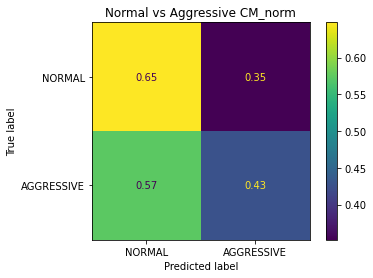

In [149]:
CM_norm = confusion_matrix(y_test, y_pred, normalize="true")

ConfusionMatrixDisplay(confusion_matrix=CM_norm, display_labels=classes).plot()
plt.title('Normal vs Aggressive CM_norm')
plt.show()

In [150]:
rfc.score(X_test, y_test)

0.5483158475980121

In [151]:
rfc_imp = pd.DataFrame(rfc.feature_importances_, columns=['importance'])

In [152]:
rfc_imp['importance'] = rfc_imp['importance'] * 100
rfc_imp = rfc_imp.set_index(X_train.columns)
rfc_imp


,importance
AccX,14.120372
AccY,13.518680
GyroZ,14.965620
DiffAccX,13.346155
DiffAccY,15.941248
VelX,15.490976
VelY,12.616949


In [153]:
rfc_imp.sort_values(by='importance', ascending=False)

,importance
DiffAccY,15.941248
VelX,15.490976
GyroZ,14.965620
AccX,14.120372
AccY,13.518680
DiffAccX,13.346155
VelY,12.616949


### Train model with RandomSearchCV

In [154]:
n_estimators = np.arange(2, 200, 2)

max_features = ['sqrt', None]

max_depth = [int(x) for x in np.linspace(5, 20, num = 20)]

min_samples_split = np.arange(2, 10)

min_samples_leaf = np.arange(1, 4)

bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
weights = {0:1, 2:2.8}
random_forest = RandomForestClassifier(random_state=0, criterion="entropy", min_impurity_decrease=0, class_weight=weights)

random_gscv = RandomizedSearchCV(random_forest, random_grid, n_iter=1000, cv=5, verbose=10, n_jobs=10, random_state=0)
random_gscv.fit(X_train, y_train)

In [156]:
random_gscv.best_params_

{'n_estimators': 68,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 14,
 'bootstrap': True}

In [157]:
random_gscv.best_score_

0.5966386554621848

In [158]:
random_gscv.score(X_train, y_train)

0.9781512605042016

In [159]:
random_gscv.score(X_test, y_test)

0.5361678630590834

In [160]:
classes = ["NORMAL", "AGGRESSIVE"]

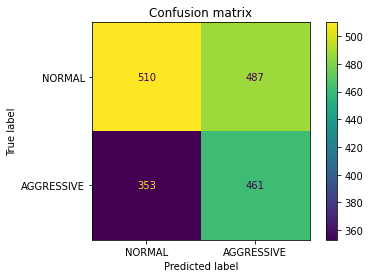

In [161]:
y_pred = random_gscv.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=classes).plot()
plt.title('Confusion matrix')
plt.show()

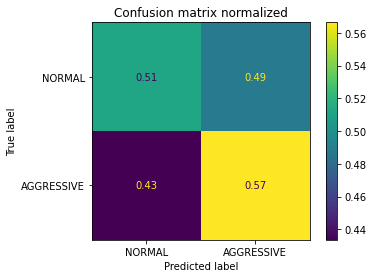

In [162]:
CM_norm = confusion_matrix(y_test, y_pred, normalize="true")

ConfusionMatrixDisplay(confusion_matrix=CM_norm, display_labels=classes).plot()
plt.title('Confusion matrix normalized')
plt.show()

#### Evaluate improvment

In [163]:
def evaluate(model, test_features, test_labels):
    accuracy = model.score(test_features, test_labels)
    print('Model Performance')
    print('Accuracy = {:0.3f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestClassifier(n_estimators = 10, random_state=0, criterion="entropy", min_impurity_decrease=0, class_weight=weights)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = random_gscv.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print(f'Improvement of {100 * (random_accuracy - base_accuracy) / base_accuracy:.3f}%.')

Model Performance
Accuracy = 0.552%.
Model Performance
Accuracy = 0.536%.
Improvement of -2.900%.


### KNN

In [164]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
Kneigh = KNeighborsClassifier(weights="uniform")

param_grid = {'n_neighbors': np.arange(1, 100), 'leaf_size': np.arange(20, 40)}

knn_gscv = GridSearchCV(Kneigh, param_grid, cv=5, verbose=10, n_jobs=10)
knn_gscv.fit(X_train, y_train)

In [166]:
best_params = knn_gscv.best_params_
best_params

{'leaf_size': 20, 'n_neighbors': 35}

In [167]:
knn_gscv.best_score_

0.6201680672268909

In [168]:
knn_gscv.score(X_train, y_train)

0.6487394957983194

In [169]:
knn_gscv.score(X_test, y_test)

0.5698509110988405

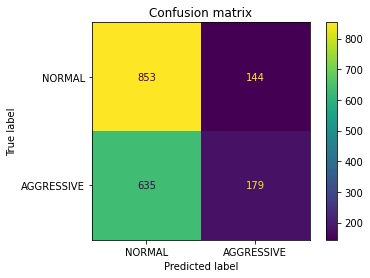

In [170]:
y_pred = knn_gscv.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=classes).plot()
plt.title('Confusion matrix')
plt.show()

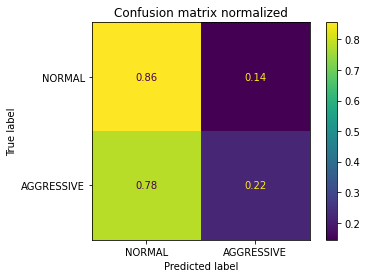

In [171]:
CM_norm = confusion_matrix(y_test, y_pred, normalize="true")

ConfusionMatrixDisplay(confusion_matrix=CM_norm, display_labels=classes).plot()
plt.title('Confusion matrix normalized')
plt.show()

#### Knn with Bagging classifier

In [172]:
from sklearn.ensemble import BaggingClassifier

knn_bagging = BaggingClassifier(KNeighborsClassifier(**knn_gscv.best_params_), max_samples=0.9, max_features=0.8, random_state=0)
knn_bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(leaf_size=20,
                                                      n_neighbors=35),
                  max_features=0.8, max_samples=0.9, random_state=0)

In [173]:
knn_bagging.score(X_train, y_train)

0.6420168067226891

In [174]:
knn_bagging.score(X_test, y_test)

0.5731639977912756

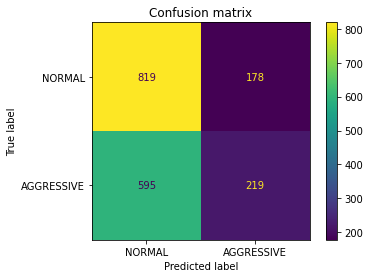

In [175]:
y_pred = knn_bagging.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=classes).plot()
plt.title('Confusion matrix')
plt.show()

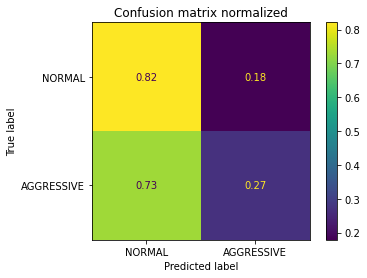

In [176]:
CM_norm = confusion_matrix(y_test, y_pred, normalize="true")

ConfusionMatrixDisplay(confusion_matrix=CM_norm, display_labels=classes).plot()
plt.title('Confusion matrix normalized')
plt.show()

In [177]:
def evaluate(model, test_features, test_labels):
    accuracy = model.score(test_features, test_labels)
    print('Model Performance')
    print('Accuracy = {:0.3f}%.'.format(accuracy))
    
    return accuracy

bagging_accuracy = evaluate(knn_bagging, X_test, y_test)

best_random = knn_gscv.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print(f'Improvement of {100 * (bagging_accuracy - random_accuracy) / random_accuracy:.3f}%.')

Model Performance
Accuracy = 0.573%.
Model Performance
Accuracy = 0.570%.
Improvement of 0.581%.
